In [1]:
import numpy as np
import matplotlib.pyplot as plt

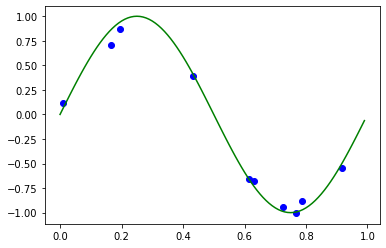

In [2]:
x_train = np.random.uniform(0,1,10)
y_train = np.sin(2*np.pi*x_train) + 0.1*np.random.randn(10)

x_test = np.random.uniform(0,1,100)
y_test = np.sin(2*np.pi*x_test) + 0.1*np.random.randn(100)


x_plotting = np.arange(0,1,.01) # for plotting
y_plotting = np.sin(2*np.pi*x_plotting) # for plotting

plt.scatter(x_train, y_train, color='b')
plt.plot(x_plotting, y_plotting, color='g')

In [3]:
def get_X_power(x,M):
    return np.stack([x**i for i in range(M+1)]).T

In [4]:
rmse_train_arr, rmse_test_arr = [],[]
def plot_solution(M):
    X_train = get_X_power(x_train,M)
    sol = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

    X_plotting = get_X_power(x_plotting, M)
    yhat_plotting = X_plotting.dot(sol)

    plt.plot(x_plotting, yhat_plotting, color='r')
    plt.scatter(x_train, y_train, color='b')
    plt.plot(x_plotting, y_plotting, color='g')
    plt.title("M={}".format(M))

    yhat_train = X_train.dot(sol)
    error_train = yhat_train-y_train
    rmse_train = np.sqrt((np.linalg.norm(error_train)**2)/len(error_train))

    X_test = get_X_power(x_test, M)
    yhat_test = X_test.dot(sol)
    error_test = yhat_test-y_test
    rmse_test = np.sqrt((np.linalg.norm(error_test)**2)/len(error_test))

    rmse_train_arr.append(rmse_train)
    rmse_test_arr.append(rmse_test)
    return rmse_train, rmse_test


(0.6769267425525524, 0.7778166683248517)

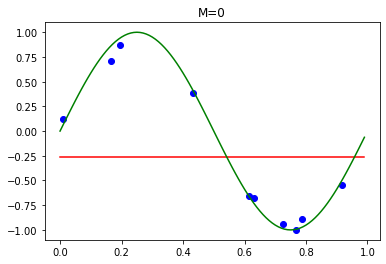

In [5]:
plot_solution(0)

(0.3728942936769678, 0.47080417989866974)

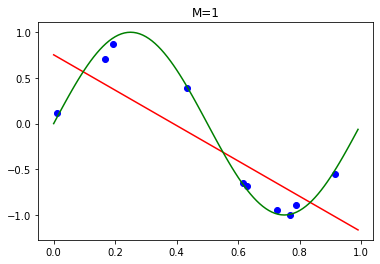

In [6]:
plot_solution(1)

(0.36896764127456, 0.46744939052925966)

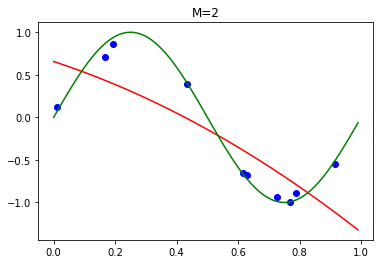

In [7]:
plot_solution(2)

(0.07343615869446889, 0.15314719922084397)

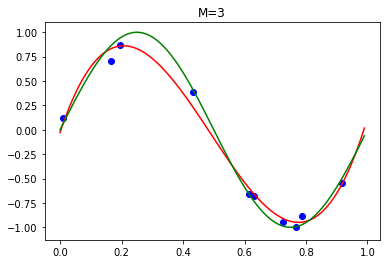

In [8]:
plot_solution(3)

(0.06117122344097527, 0.1427747820196414)

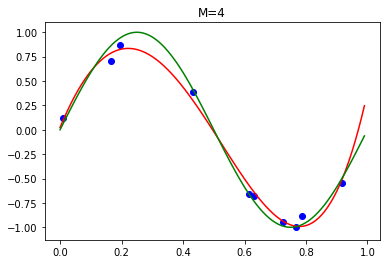

In [9]:
plot_solution(4)

(0.028372201646148083, 0.12818150867841255)

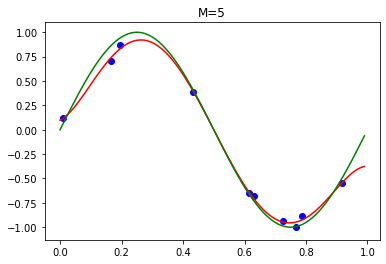

In [10]:
plot_solution(5)

(0.026012905390097478, 0.13010813290026105)

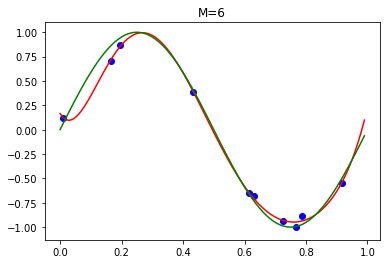

In [11]:
plot_solution(6)

(0.021835737485826866, 0.2081105260315336)

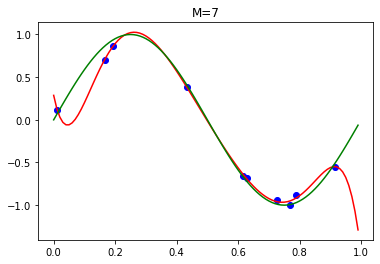

In [12]:
plot_solution(7)

(0.006794031162900949, 2.012116571600399)

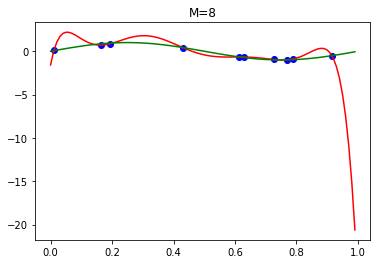

In [13]:
plot_solution(8)

(0.048457340746666605, 3.523366525974649)

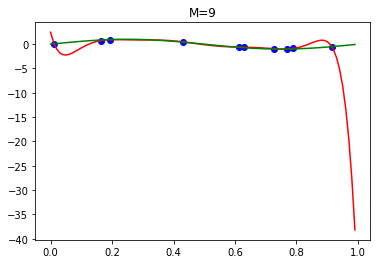

In [14]:
plot_solution(9)

Text(0.5, 1.0, 'Train and Test RMSE vs M (Model complexity)')

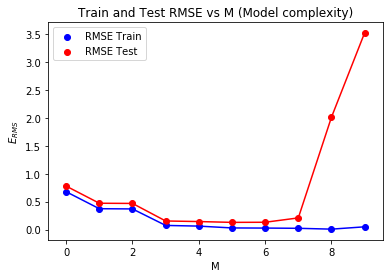

In [15]:
plt.scatter(np.arange(10), rmse_train_arr, color='b', label="RMSE Train")
plt.scatter(np.arange(10), rmse_test_arr, color='r', label="RMSE Test")
plt.plot(np.arange(10), rmse_train_arr, color='b')
plt.plot(np.arange(10), rmse_test_arr, color='r')
plt.xlabel("M")
plt.ylabel("$E_{RMS}$")
plt.legend()
plt.title("Train and Test RMSE vs M (Model complexity)")

In [16]:
# Regularization
def plot_solution_regularized(M, ln_lambda):
    X_train = get_X_power(x_train,M)
    sol = np.linalg.inv(X_train.T.dot(X_train)+np.exp(ln_lambda)*np.eye(M+1)).dot(X_train.T).dot(y_train)

    X_plotting = get_X_power(x_plotting, M)
    yhat_plotting = X_plotting.dot(sol)

    plt.plot(x_plotting, yhat_plotting, color='r')
    plt.scatter(x_train, y_train, color='b')
    plt.plot(x_plotting, y_plotting, color='g')
    plt.title("M={}".format(M))

    yhat_train = X_train.dot(sol)
    error_train = yhat_train-y_train
    rmse_train = np.sqrt((np.linalg.norm(error_train)**2)/len(error_train))

    X_test = get_X_power(x_test, M)
    yhat_test = X_test.dot(sol)
    error_test = yhat_test-y_test
    rmse_test = np.sqrt((np.linalg.norm(error_test)**2)/len(error_test))

    rmse_train_arr.append(rmse_train)
    rmse_test_arr.append(rmse_test)
    return rmse_train, rmse_test



Text(0.5, 1.0, 'Regularized Fit $M=9,\\ln\\lambda=-18$')

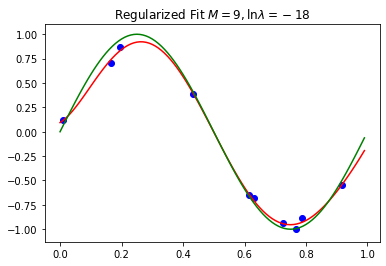

In [17]:
plot_solution_regularized(9, -18)
plt.title("Regularized Fit $M=9,\ln\lambda=-18$")

Text(0.5, 1.0, 'Regularized Fit $M=9,\\ln\\lambda=0$')

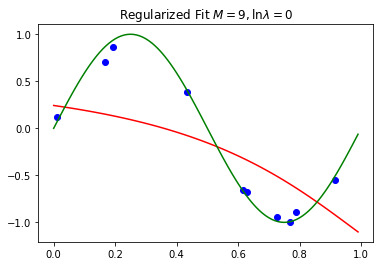

In [18]:
# over regularized: High lambda
plot_solution_regularized(9, 0)
plt.title("Regularized Fit $M=9,\ln\lambda=0$")

Text(0.5, 1.0, 'Train and Test RMSE vs $\\ln\\lambda$ for M=9 polynomial')

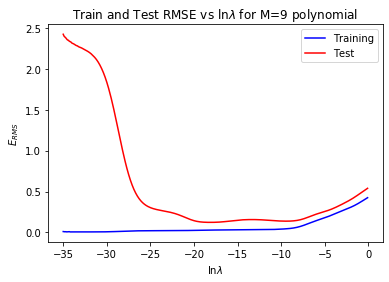

In [19]:
rmse_train_arr, rmse_test_arr = [],[]
def run_solution_regularized(M, ln_lambda):
    X_train = get_X_power(x_train,M)
    sol = np.linalg.inv(X_train.T.dot(X_train)+np.exp(ln_lambda)*np.eye(M+1)).dot(X_train.T).dot(y_train)

    X_plotting = get_X_power(x_plotting, M)
    yhat_plotting = X_plotting.dot(sol)

    yhat_train = X_train.dot(sol)
    error_train = yhat_train-y_train
    rmse_train = np.sqrt((np.linalg.norm(error_train)**2)/len(error_train))

    X_test = get_X_power(x_test, M)
    yhat_test = X_test.dot(sol)
    error_test = yhat_test-y_test
    rmse_test = np.sqrt((np.linalg.norm(error_test)**2)/len(error_test))

    rmse_train_arr.append(rmse_train)
    rmse_test_arr.append(rmse_test)


for ln_lambda in np.arange(-35,0,.1):
    run_solution_regularized(9, ln_lambda)


plt.plot(np.arange(-35,0,.1), rmse_train_arr, color='b', label="Training")
plt.plot(np.arange(-35,0,.1), rmse_test_arr, color='r', label="Test")
plt.xlabel("$\ln\lambda$")
plt.ylabel("$E_{RMS}$")
plt.legend()
plt.title("Train and Test RMSE vs $\ln\lambda$ for M=9 polynomial")